In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
df = pd.read_csv("data/student-mat.csv", sep=";")
print(df.head()) # so we have  [5 rows x 33 columns]

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [99]:
print(df.isnull().sum())

print(df.dtypes)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      obje

In [100]:
df = df.dropna()

so the data type in int and theres no null values in our dataset 


In [101]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [102]:
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'absences', 'G1', 'G2']
df[num_cols] = scaler.fit_transform(df[num_cols])



###  Feature Scaling with StandardScaler

We standardize numerical features (`age`, `absences`, `G1`, `G2`) using `StandardScaler` from scikit-learn.  
This scales the data to have a mean of 0 and standard deviation of 1 — useful for improving model performance.

\[
x_{scaled} = \frac{x - \mu}{\sigma}
\]


In [103]:
df['avg_grade'] = (df['G1'] + df['G2']) / 2

print(df.head())


        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  1.023046     4     4           2          2         0       4         3   
1  0.238380     1     1           1          2         0       5         3   
2 -1.330954     1     1           1          2         3       4         3   
3 -1.330954     4     2           1          3         0       3         2   
4 -0.546287     3     3           1          2         0       4         3   

   goout  Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0      4     1  ...           False           True       False     False   
1      3     1  ...           False          False        True     False   
2      2     2  ...           False           True       False      True   
3      2     1  ...           False          False        True      True   
4      2     1  ...           False          False        True      True   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \


okay this a new feature with the average of G1,G2 to be compared to the predicted G3

In [104]:
X = df.drop('G3', axis=1)
y = df['G3']

splitting the data to input and output

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splitting into data training set and testing set 

In [106]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

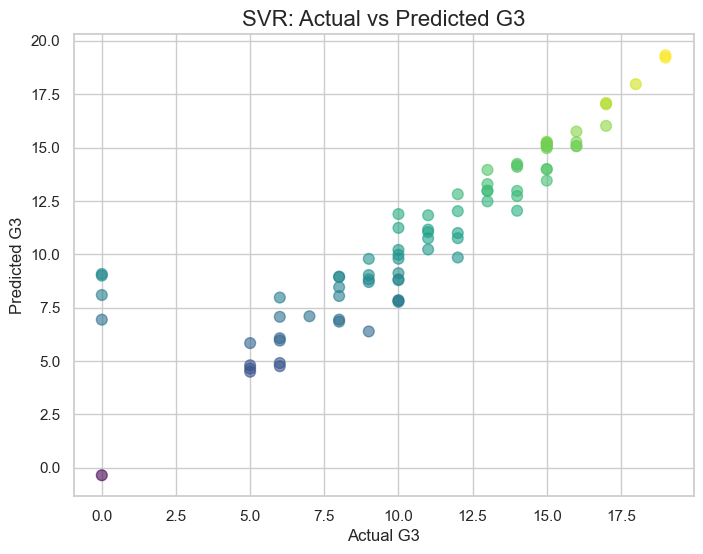

In [107]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=60, c=y_pred, cmap='viridis')


plt.title("SVR: Actual vs Predicted G3", fontsize=16)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)

plt.show()

In [108]:
#Loading Dataset 

In [109]:
df = pd.read_csv("data/student-mat.csv", sep=';')
print("Preview of the dataset:")
display(df.head())

Preview of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [110]:
#Summary Statistics 

In [111]:
print("\nSummary statistics for numerical features:")
display(df.describe())


Summary statistics for numerical features:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [112]:
#Checking for messing values 

In [113]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [114]:
#Correlation Analysis

In [115]:
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation matrix:")
display(correlation_matrix)


Correlation matrix:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


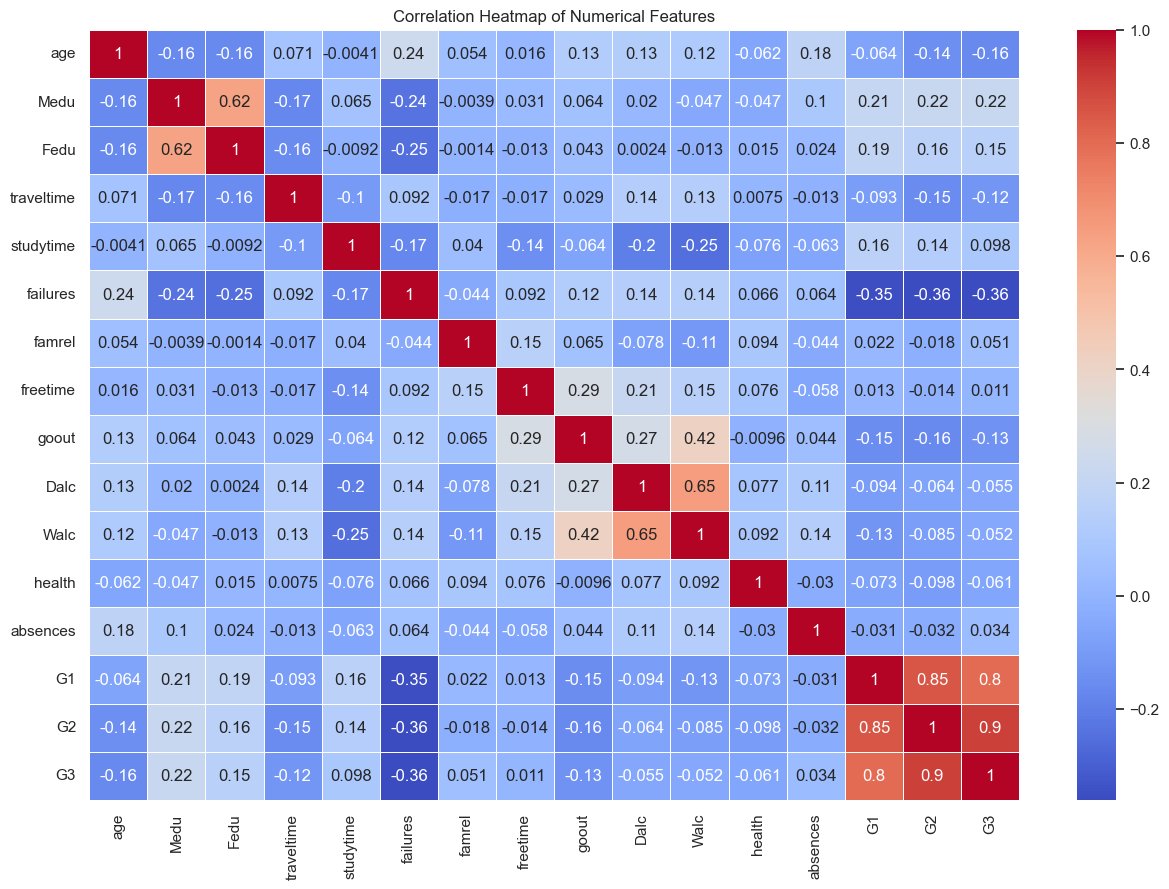

In [116]:

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [117]:
#Feature Relationships with Final Grade (G3)

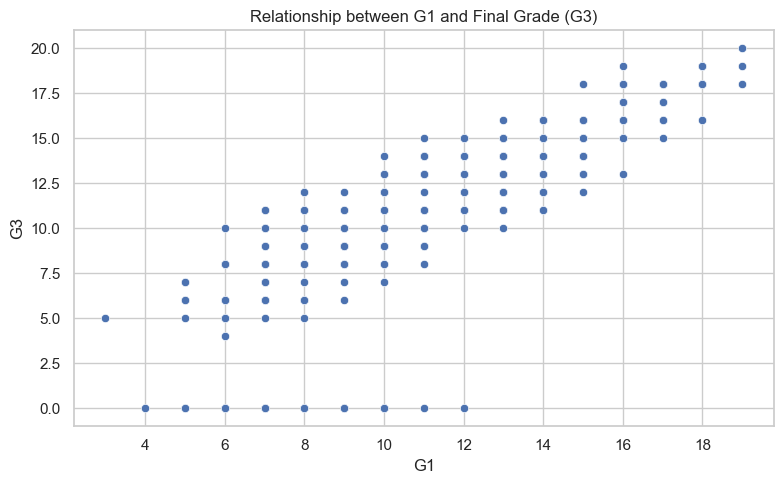

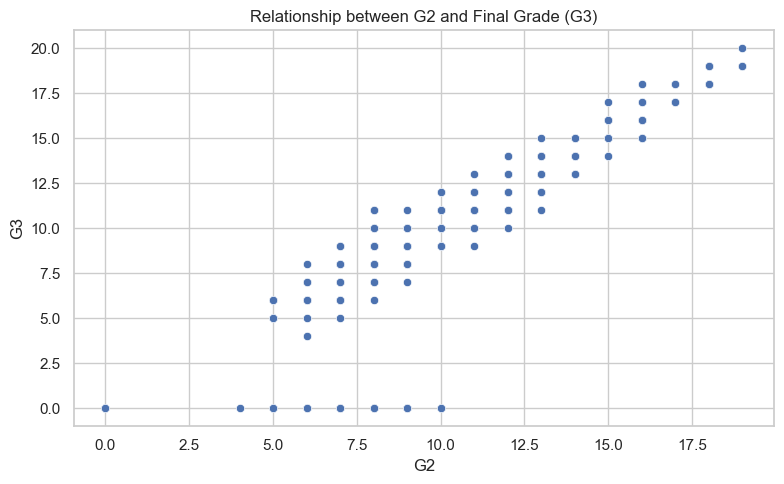

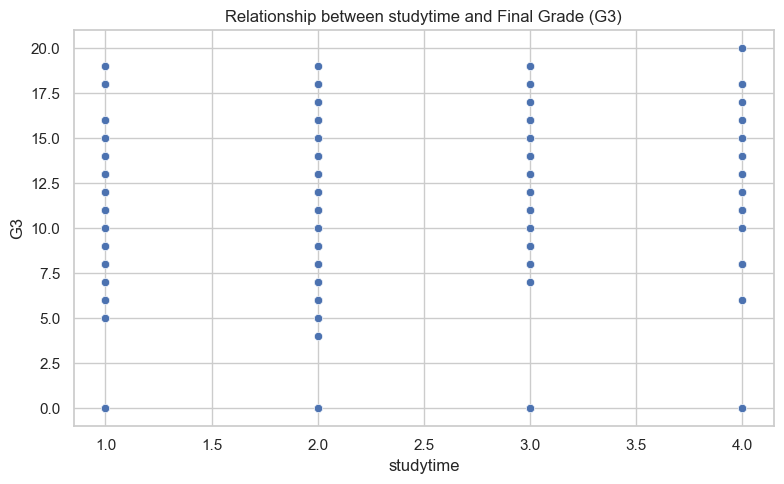

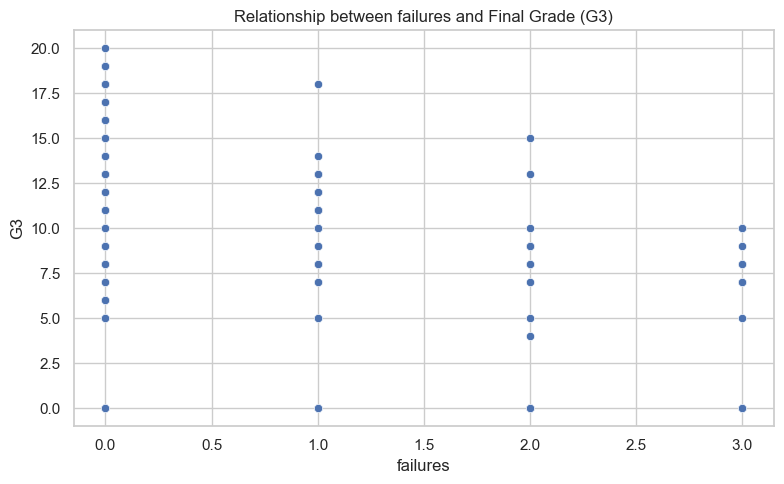

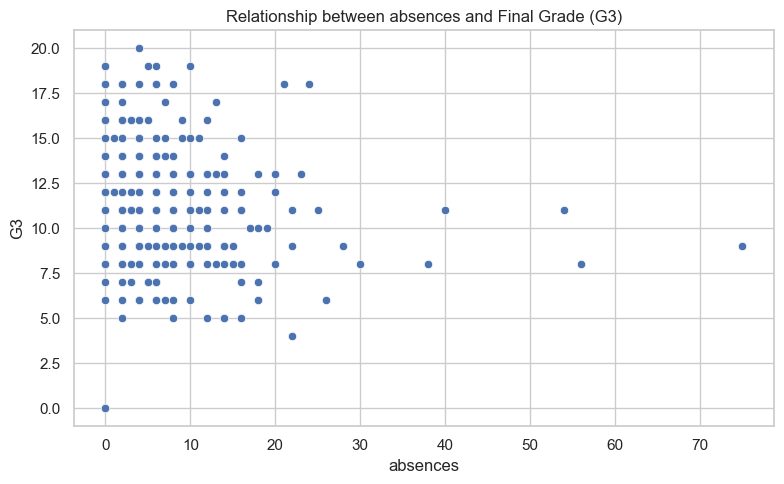

In [118]:
features_to_plot = ['G1', 'G2', 'studytime', 'failures', 'absences']
for feature in features_to_plot:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y='G3')
    plt.title(f'Relationship between {feature} and Final Grade (G3)')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.tight_layout()
    plt.show()

In [119]:
#Distribution of Final Grades (G3)

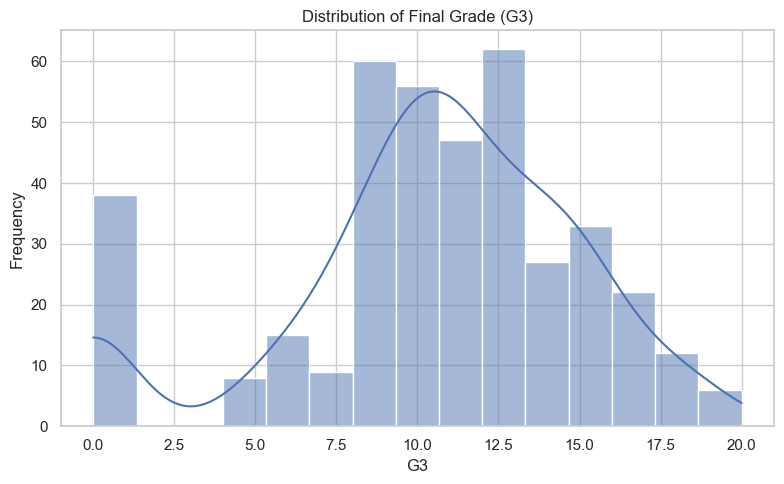

In [120]:
plt.figure()
sns.histplot(df['G3'], kde=True, bins=15)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [121]:
#Impact of Categorical Features on Final Grade (G3)

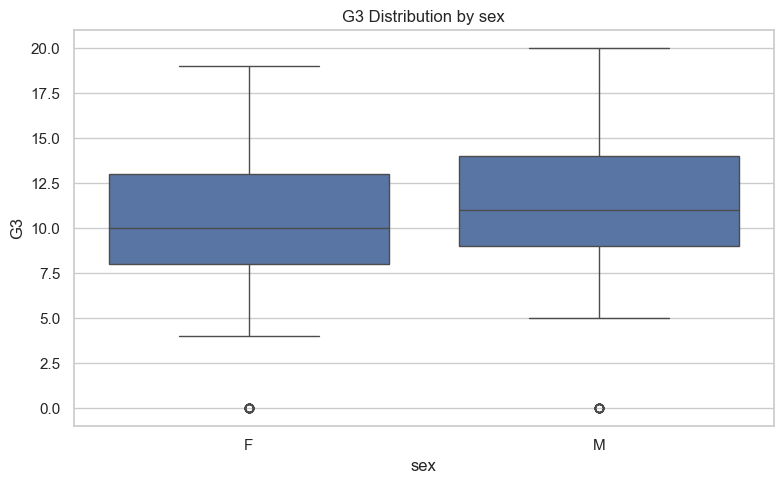

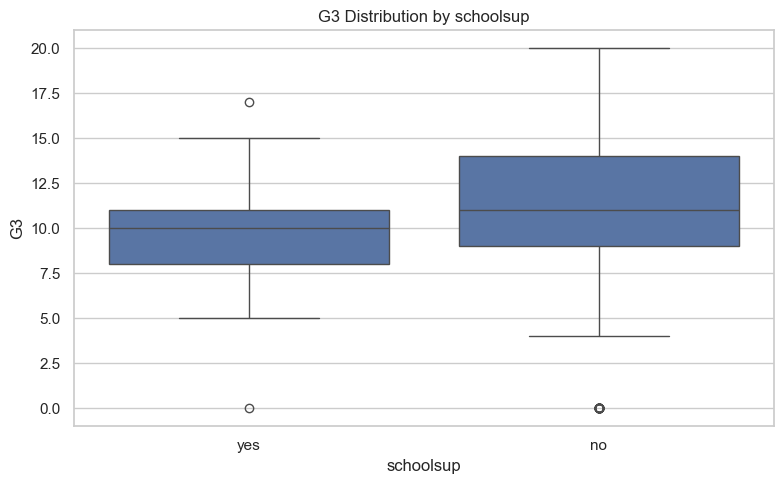

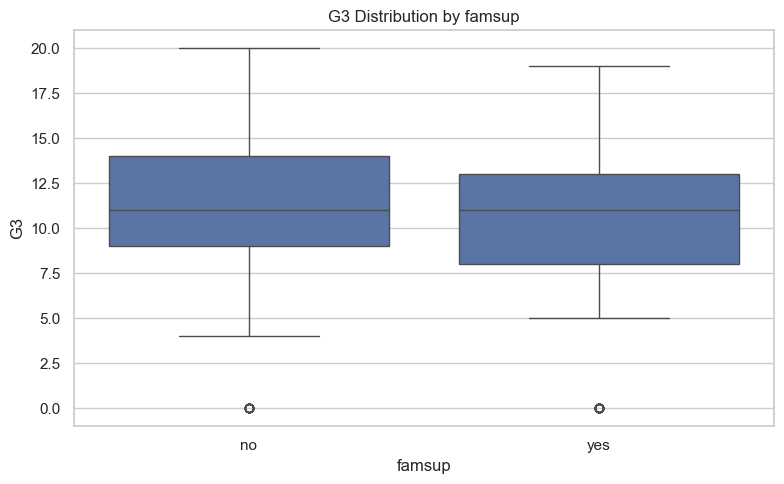

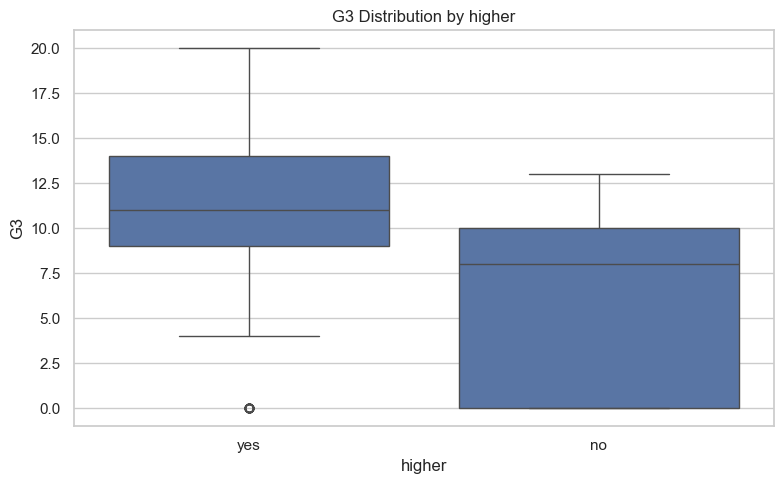

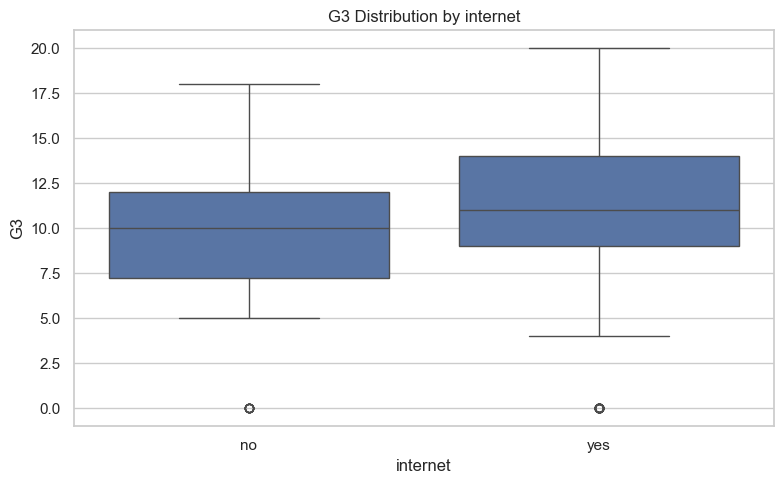

In [122]:
categorical_features = ['sex', 'schoolsup', 'famsup', 'higher', 'internet']
for cat in categorical_features:
    plt.figure()
    sns.boxplot(data=df, x=cat, y='G3')
    plt.title(f"G3 Distribution by {cat}")
    plt.tight_layout()
    plt.show()

In [123]:
x = df[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = df['G3']


In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results_lr = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'R²': r2_score(y_test, y_pred_lr)
}
print("Linear Regression Results:")
for metric, value in results_lr.items():
    print(f"  {metric}: {value:.4f}")
print("\n")

Linear Regression Results:
  RMSE: 2.1134
  MAE: 1.3394
  R²: 0.7822




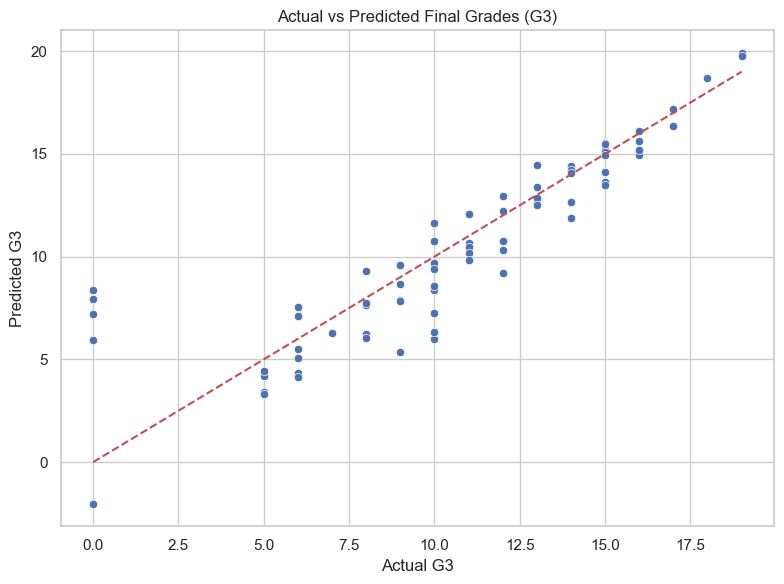

In [127]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Final Grades (G3)')
plt.grid(True)
plt.tight_layout()
plt.show()

Gradient Boosting Regression Results (Test Set):
  RMSE: 1.7075
  MAE: 1.0626
  R²: 0.8578


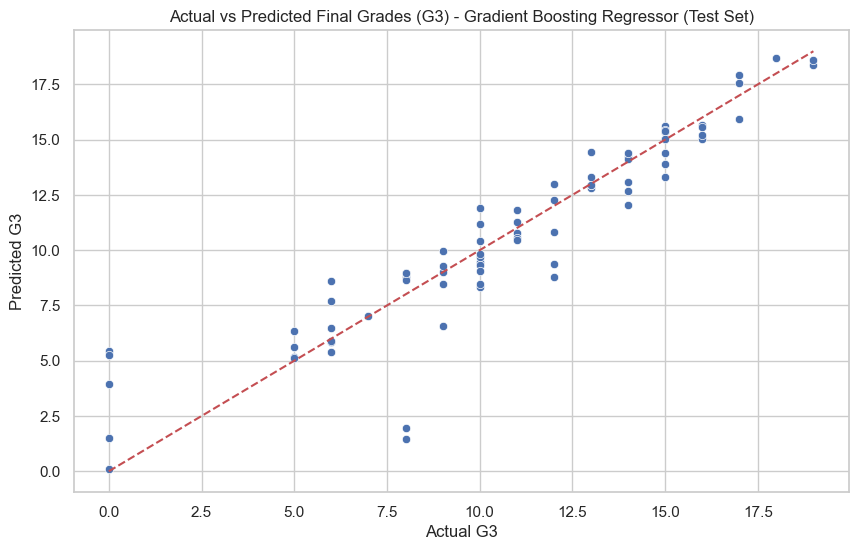

In [128]:
# Initialize and fit the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on test data
y_pred = gbr.predict(X_test)

# Evaluate performance
results = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R²': r2_score(y_test, y_pred)
}

# Print results
print("Gradient Boosting Regression Results (Test Set):")
for metric, value in results.items():
    print(f"  {metric}: {value:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3) - Gradient Boosting Regressor (Test Set)")
plt.grid(True)
plt.show()